In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM nem''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,NEM,XEM,2015-04-02 23:59:59,0.000323,0.000227,0.000242,0.000314,28549.400391,2.823534e+06
1,2,NEM,XEM,2015-04-03 23:59:59,0.000330,0.000291,0.000309,0.000310,20677.900391,2.792457e+06
2,3,NEM,XEM,2015-04-04 23:59:59,0.000318,0.000251,0.000310,0.000277,23550.199219,2.488770e+06
3,4,NEM,XEM,2015-04-05 23:59:59,0.000283,0.000218,0.000272,0.000232,26800.199219,2.087388e+06
4,5,NEM,XEM,2015-04-06 23:59:59,0.000299,0.000229,0.000232,0.000289,22511.500000,2.598354e+06


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288 entries, 0 to 2287
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        2288 non-null   object 
 1   Symbol      2288 non-null   object 
 2   Date        2288 non-null   object 
 3   High        2288 non-null   float64
 4   Low         2288 non-null   float64
 5   Open        2288 non-null   float64
 6   Close       2288 non-null   float64
 7   Volume      2288 non-null   float64
 8   Marketcap   2288 non-null   float64
 9   Range       2288 non-null   float64
 10  Difference  2288 non-null   float64
dtypes: float64(8), object(3)
memory usage: 196.8+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288 entries, 0 to 2287
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        2288 non-null   object        
 1   Symbol      2288 non-null   object        
 2   Date        2288 non-null   datetime64[ns]
 3   High        2288 non-null   float64       
 4   Low         2288 non-null   float64       
 5   Open        2288 non-null   float64       
 6   Close       2288 non-null   float64       
 7   Volume      2288 non-null   float64       
 8   Marketcap   2288 non-null   float64       
 9   Range       2288 non-null   float64       
 10  Difference  2288 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 196.8+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,2288.000000,2288.000000,2288.000000,2288.000000,2.288000e+03,2.288000e+03,2288.000000,2.288000e+03
mean,0.132112,0.116248,0.124703,0.124662,4.428130e+07,1.121956e+09,0.015864,-4.062360e-05
std,0.213759,0.179739,0.198448,0.197990,2.138735e+08,1.781909e+09,0.042441,2.760956e-02
min,0.000089,0.000079,0.000086,0.000086,6.905080e+01,7.714359e+05,0.000002,-3.506700e-01
25%,0.005281,0.004803,0.005003,0.005005,1.265158e+05,4.504833e+07,0.000343,-1.197553e-03
50%,0.055468,0.051347,0.053189,0.053232,1.064993e+07,4.790889e+08,0.003426,4.159956e-07
75%,0.181424,0.164430,0.174522,0.174566,3.008101e+07,1.571092e+09,0.014432,1.019694e-03
max,2.091880,1.626020,1.835580,1.842720,8.707254e+09,1.658448e+10,0.671925,6.421000e-01


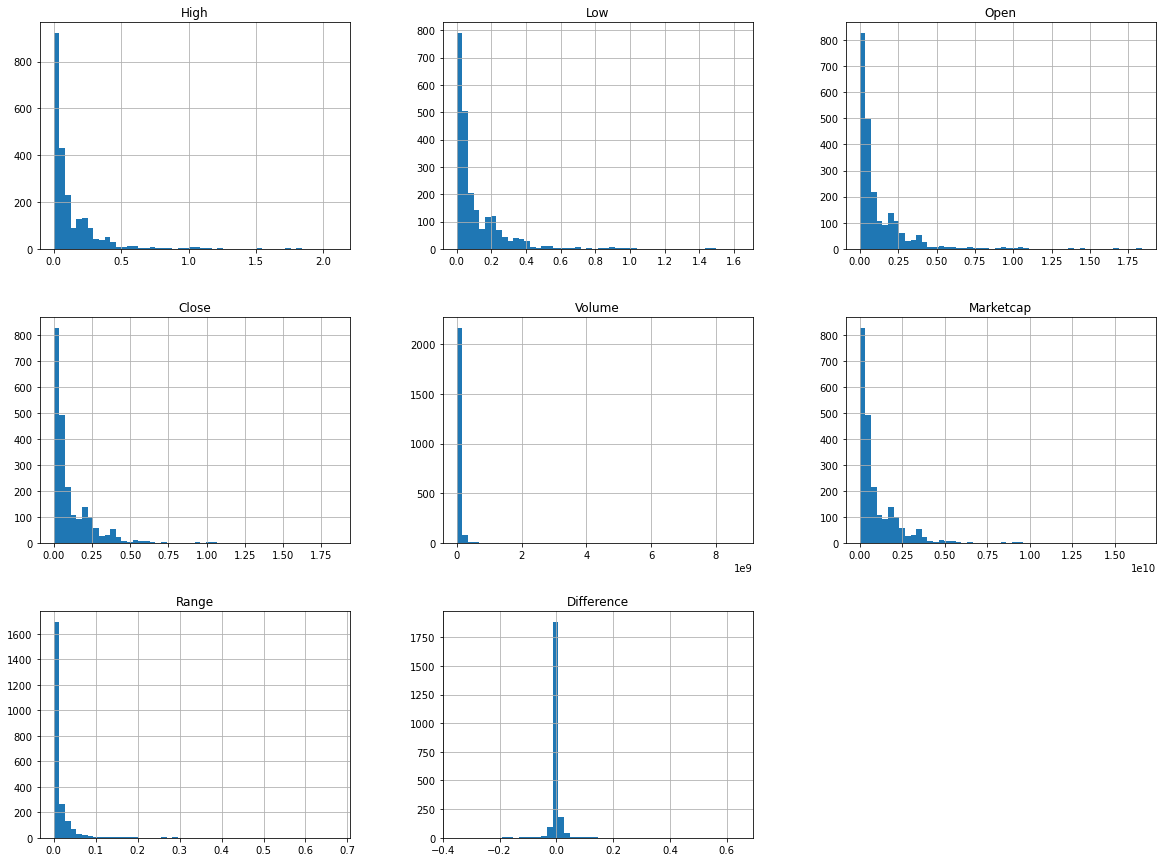

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,1020,982,2171,995,1008,1012,1036,2154,1034,1025
Date,2018-01-16 23:59:59,2017-12-09 23:59:59,2021-03-12 23:59:59,2017-12-22 23:59:59,2018-01-04 23:59:59,2018-01-08 23:59:59,2018-02-01 23:59:59,2021-02-23 23:59:59,2018-01-30 23:59:59,2018-01-21 23:59:59
Difference,-0.35067,-0.238706,-0.202717,-0.195043,-0.19077,-0.17474,-0.173289,-0.171738,-0.159241,-0.15781


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,1007,981,1031,1011,991,1002,1016,2153,1041,1006
Date,2018-01-03 23:59:59,2017-12-08 23:59:59,2018-01-27 23:59:59,2018-01-07 23:59:59,2017-12-18 23:59:59,2017-12-29 23:59:59,2018-01-12 23:59:59,2021-02-22 23:59:59,2018-02-06 23:59:59,2018-01-02 23:59:59
Difference,0.6421,0.404411,0.214816,0.1873,0.15953,0.14325,0.1308,0.129973,0.128239,0.11852


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

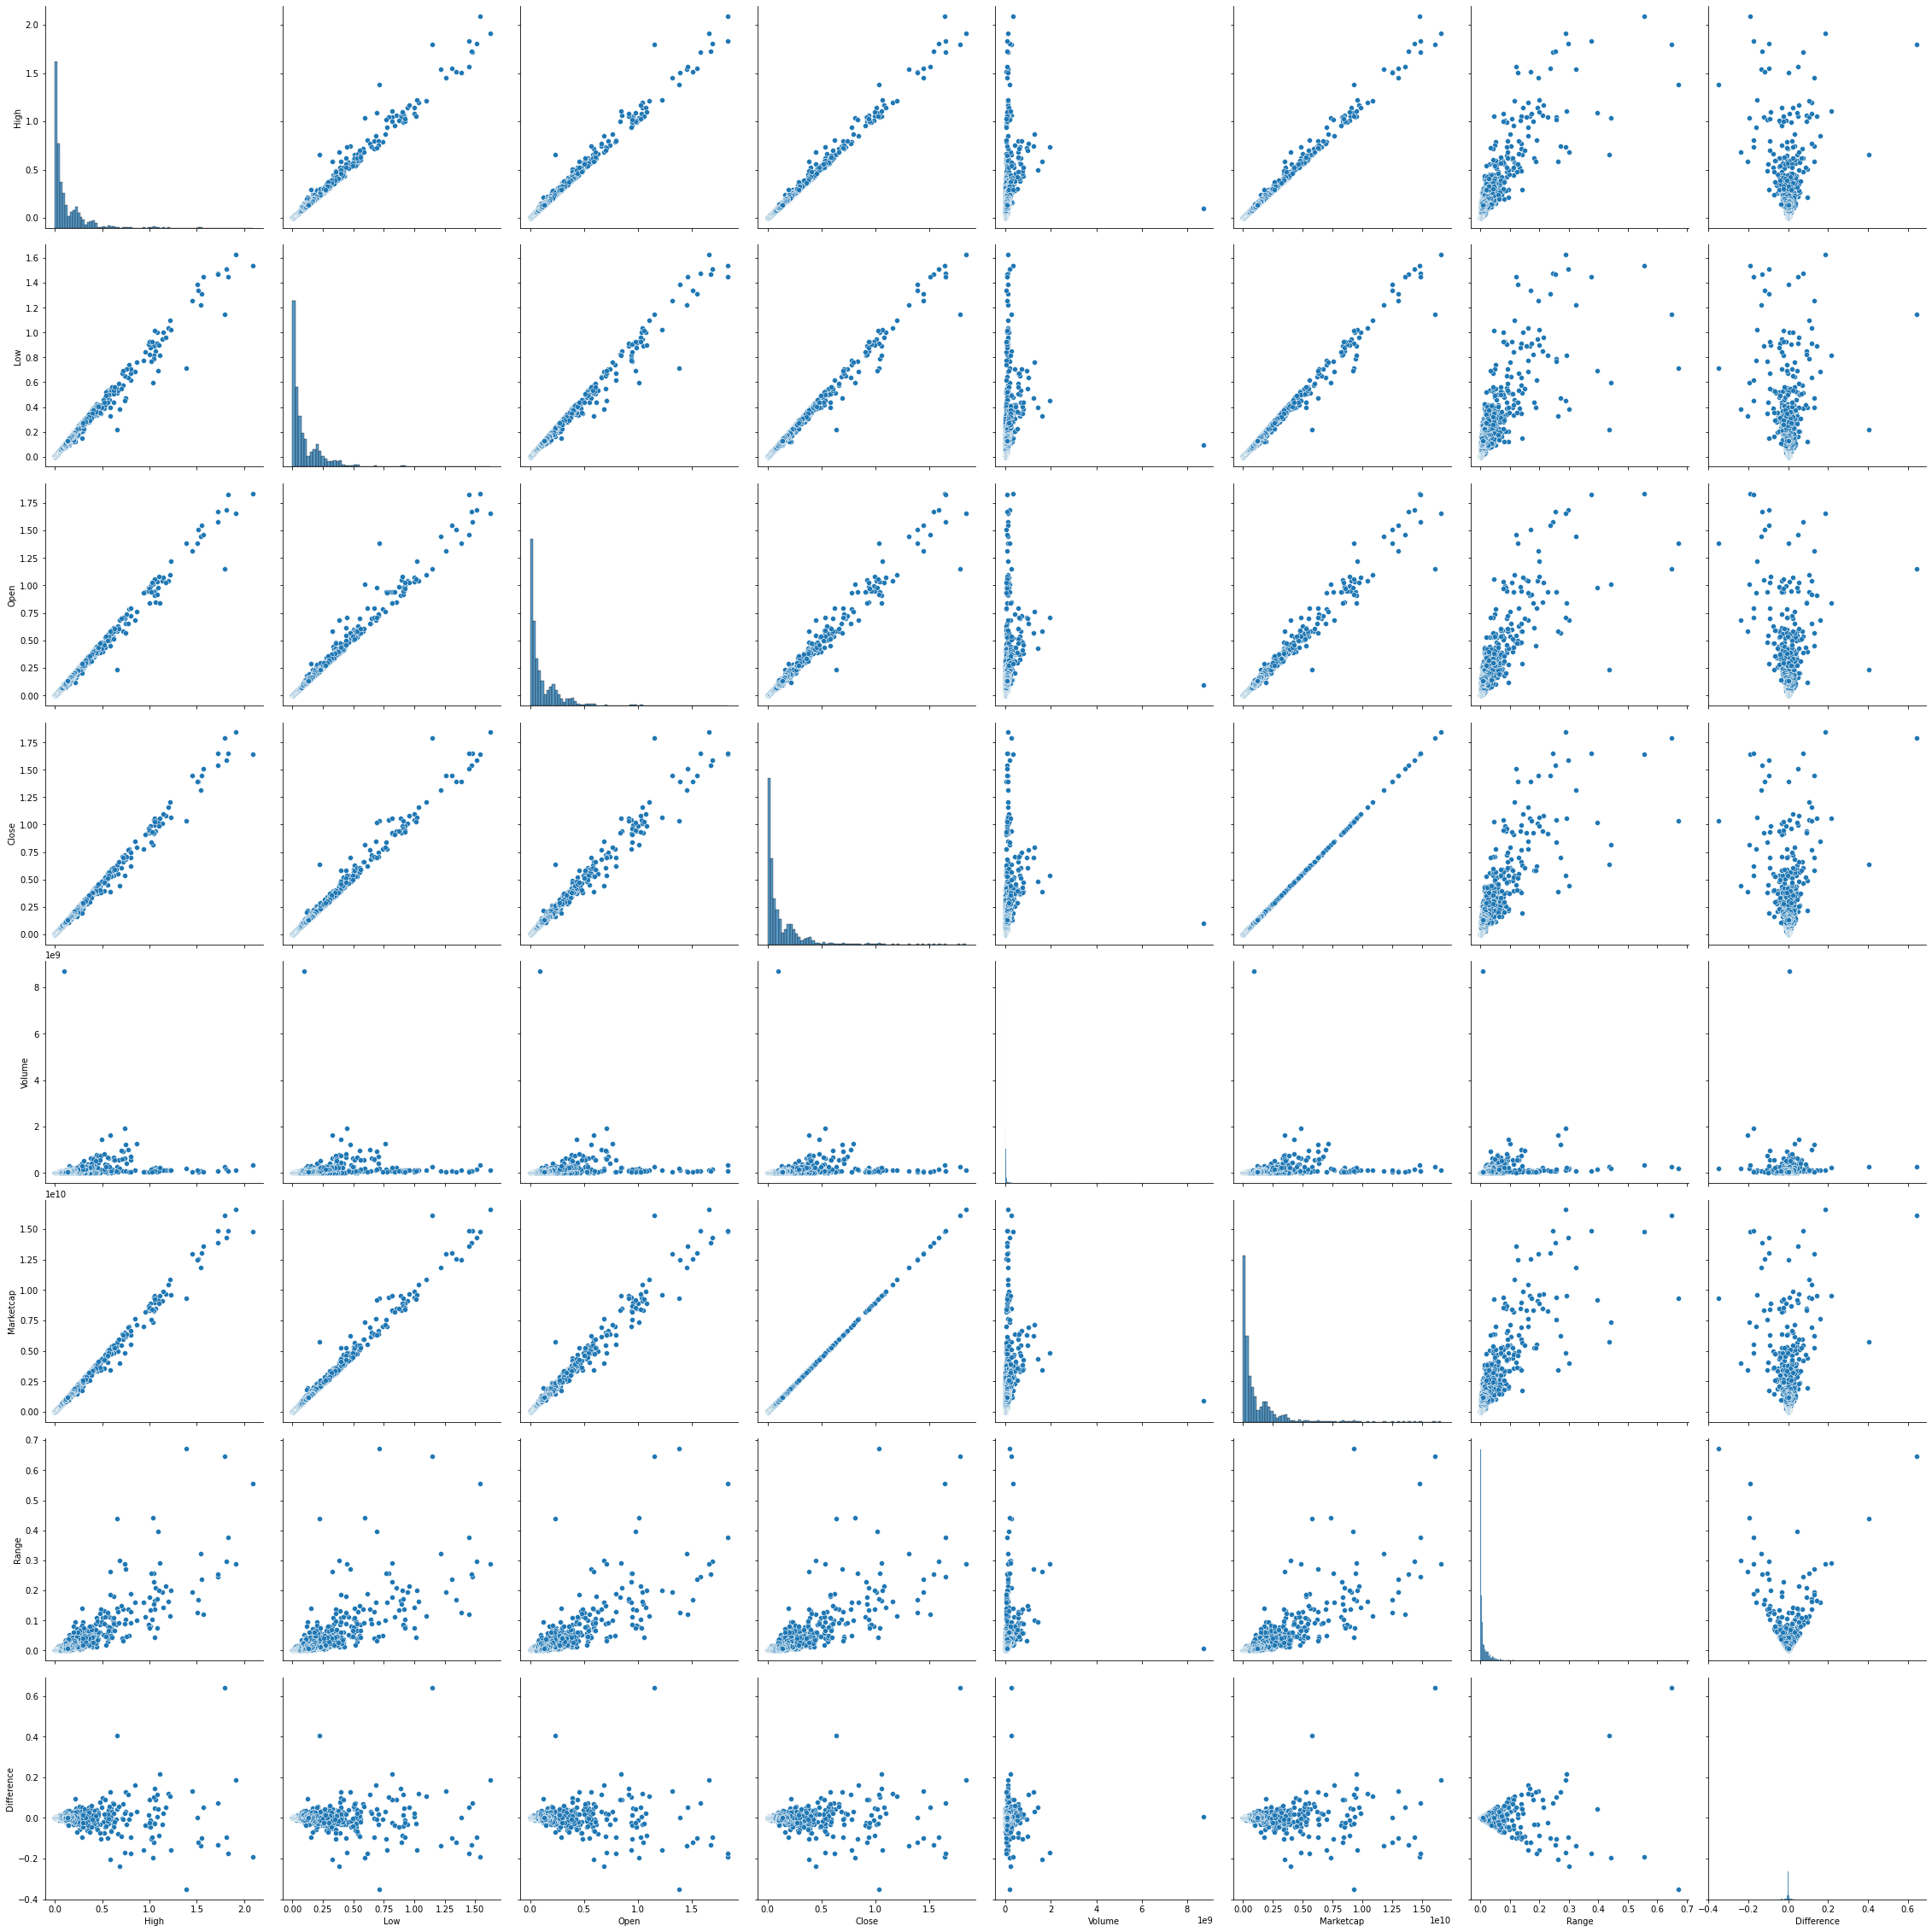

In [15]:
sns.pairplot(data,height=4);
